In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [57]:
class SIR_Generator():
    
    def __init__(self,loc=0,scale=1,df=1,ls_values=[], n=1,distribution='exponencial'):
        self.loc= loc
        self.scale= scale
        self.df= df
        self.ls_values= ls_values
        self.distribution= distribution
        self.n= n
        self.var={"beta": stats.beta(a=self.loc, b=self.scale),
                  "cauchy": stats.cauchy(loc=self.loc, scale=self.scale),
                  "chi": stats.chi(df=self.loc),
                  "exponencial":stats.expon(loc=self.loc, scale=self.scale),
                  "gamma": stats.gamma(a=self.loc, scale= 1/self.scale),
                  "laplace": stats.laplace(loc=self.loc,scale=self.scale),
                  "lognormal": stats.lognorm(s= self.loc),
                  "normal": stats.norm(loc= self.loc, scale=self.scale),
                  
                 }
        
    def getNorm(self,loc,scale):
        X=self.var[self.distribution]
        Y= stats.norm(loc= 0, scale=1)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        values= np.random.choice(x,size=self.n,replace=True,p=W)
        ls=[]
        for val in values:
            u= np.random.uniform(size=1)
            if(u<=.5):
                ls.append(val)
            else:
                ls.append(-val)
        self.ls_values= loc+ np.array(ls)*(scale)
        
    def getLognorm(self,loc):
        X=self.var[self.distribution]
        Y= stats.lognorm(s= loc)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W) 
        
    def getChi(self, df):
        X=self.var[self.distribution]
        Y= stats.chi(df=df)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)
        
    def getBeta(self,loc,scale):
        X=self.var[self.distribution]
        Y= stats.beta(a=loc, b=scale)
        x= X.rvs(size=self.n)
        #x/=(max(x)-min(x))
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)
        
    def getArcsin(self):
        self.getBeta(loc=.5,scale=.5)
        
    def getStandardUniform(self):
        self.getBeta(loc=1,scale=1)
    
    def getInvertBeta(self,loc,scale):
        self.getBeta(loc,scale)
        self.ls_values/=(1-self.ls_values)
        
    def getCauchy(self, loc, scale):
        X=self.var[self.distribution]
        Y= stats.cauchy(loc=loc,scale=scale)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)
    
    def getStandardCauchy(self,):
        self.getCauchy(0,1)
        
    def getGamma(self,loc,scale):
        X=self.var[self.distribution]
        Y= stats.gamma(a=loc,scale=1/scale)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)
    
    def getChi2(self,df):
        self.getGamma(loc=2,scale=df/2)
    
    def getErlang(self,loc,n):
        self.getGamma(loc=loc,scale=n)
    
    def getLaplace(self,loc,scale):
        X=self.var[self.distribution]
        Y= stats.laplace(loc=loc,scale=scale)
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)
        
    def getError(self,a):
        self.getLaplace(a,a)
        
    def getPareto(self,loc,scale):
        U= np.random.uniform(size= self.n)+ loc
        self.ls_values= (U**(-(1/scale)))*loc
        
    def getLogLogistic(self,loc,scale):
        X=self.var[self.distribution]
        l=loc
        k= scale
        y_pdf= eval('(l*k*((l*x)**(k-1)))/((1+(l*x)**k)**2)')
        x= X.rvs(size=self.n)
        W=y_pdf/X.pdf(x)
        W/=W.sum()
        self.ls_values= np.random.choice(x,size=self.n,replace=True,p=W)

 Instancia a la clase con la variable que gusta generar otra distribución y el número de muestras

In [58]:
generador= SIR_Generator(scale=2,n=100000, distribution="exponencial")

Llama a la función para obtener los resultados los cuales se guardan en ls_values 

In [59]:
generador.getLogLogistic(loc=4,scale=1)

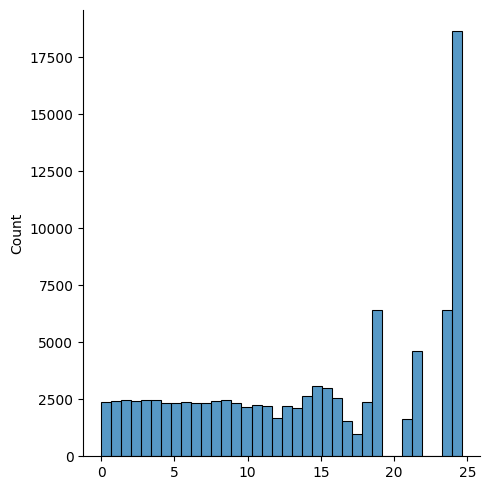

In [60]:
sns.displot(generador.ls_values)